In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def compute_v(data_dict):

    v = []
    
    for i in range(len(data_dict['x'])):
        v_i = np.array([data_dict['x'][i], data_dict['y'][i], data_dict['z'][i]])
        v.append(v_i)
    
    return v

In [15]:
def compute_position(data_dict, r, s):

    R = data_dict['rotation_matrices']

    positions = []

    for i in range(len(R)):
        # Compute the position
        pos = r + np.dot(R[i], s)
        positions.append(pos)    
    
    return positions

In [16]:
def compute_rotation_matrices(data_dict):
    q_0 = data_dict['euler_1']
    q_1 = data_dict['euler_2']
    q_2 = data_dict['euler_3']
    q_3 = data_dict['euler_4']
    
    rotation_matrices = []
    
    for i in range(len(q_0)):
        
        # Compute the rotation matrix

        R = np.array([
            [1-2*(q_2[i]**2+q_3[i]**2), 2*(q_1[i]*q_2[i] - q_0[i]*q_3[i]), 2*(q_1[i]*q_3[i] + q_0[i]*q_2[i])],
            [2*(q_1[i]*q_2[i] + q_0[i]*q_3[i]), 1-2*(q_1[i]**2+q_3[i]**2), 2*(q_2[i]*q_3[i] - q_0[i]*q_1[i])],
            [2*(q_1[i]*q_3[i] - q_0[i]*q_2[i]), 2*(q_2[i]*q_3[i] + q_0[i]*q_1[i]), 1-2*(q_1[i]**2+q_2[i]**2)]
            ])    

        rotation_matrices.append(R)
    
    return rotation_matrices

In [17]:
def compute_error(data_dict):
    v = data_dict['v']
    positions = data_dict['positions']
    
    errors = []
    
    for v_i, pos_i in zip(v, positions):
        error = v_i - pos_i
        errors.append(error)
    
    return np.array(errors)

In [ ]:
# %%
# Read the data from the file
data2 = pd.read_csv('part2_euler.tab', sep='\s+', skiprows=1, header=0)

# Convert the DataFrame to a NumPy array
data2 = data2.to_numpy()

# Define the keys corresponding to each column
keys = ['time','euler_1', 'euler_2', 'euler_3', 'euler_4', 'x', 'y', 'z']

# Create a dictionary mapping keys to columns
data_dict2 = {key: data2[:, idx] for idx, key in enumerate(keys)}

r2 = np.array([-0.75, 0.5, 0])
cm2 = np.array([-0.4, 0.5, 0])
s2 = cm2 - r2

data_dict2['rotation_matrices'] = compute_rotation_matrices(data_dict2)
data_dict2['v'] = compute_v(data_dict2)
data_dict2['positions'] = compute_position(data_dict2, r2, s2)
data_dict2['error'] = compute_error(data_dict2)

In [ ]:
# Read the data from the file
data3 = pd.read_csv('part3_euler.tab', sep='\s+', skiprows=1, header=0)

# Convert the DataFrame to a NumPy array
data3 = data3.to_numpy()

# Define the keys corresponding to each column
keys = ['time','euler_1', 'euler_2', 'euler_3', 'euler_4', 'x', 'y', 'z']

# Create a dictionary mapping keys to columns
data_dict3 = {key: data3[:, idx] for idx, key in enumerate(keys)}

r3 = np.array([0.45, 0.45, 0])
cm3 = np.array([0.8, 0.45, 0])
s3 = cm3 - r3

data_dict3['rotation_matrices'] = compute_rotation_matrices(data_dict3)
data_dict3['v'] = compute_v(data_dict3)
data_dict3['positions'] = compute_position(data_dict3, r3, s3)
data_dict3['error'] = compute_error(data_dict3)

In [ ]:
# Read the data from the file
data4 = pd.read_csv('part4_euler.tab', sep='\s+', skiprows=1, header=0)

# Convert the DataFrame to a NumPy array
data4 = data4.to_numpy()

# Define the keys corresponding to each column
keys = ['time','euler_1', 'euler_2', 'euler_3', 'euler_4', 'x', 'y', 'z']

# Create a dictionary mapping keys to columns
data_dict4 = {key: data4[:, idx] for idx, key in enumerate(keys)}

r4 = np.array([0.75, -0.5, 0])
cm4 = np.array([0.75, -0.85, 0])
s4 = cm4 - r4

data_dict4['rotation_matrices'] = compute_rotation_matrices(data_dict4)
data_dict4['v'] = compute_v(data_dict4)
data_dict4['positions'] = compute_position(data_dict4, r4, s4)
data_dict4['error'] = compute_error(data_dict4)

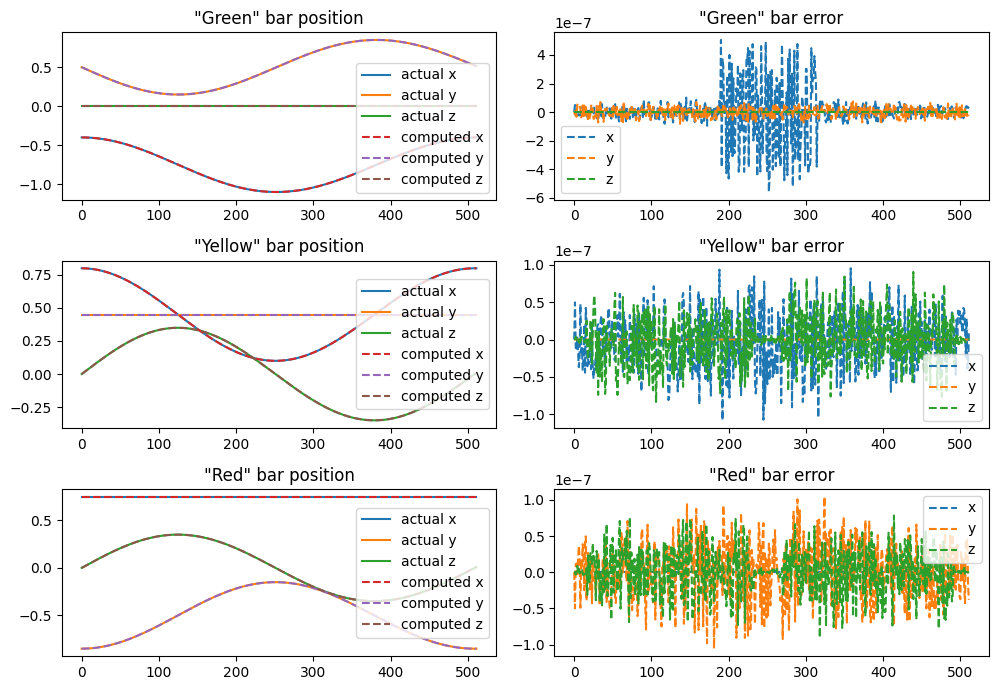

In [44]:
fig, axs = plt.subplots(3, 2, figsize=(10, 7))

axs[0,1].plot(data_dict2['error'], linestyle='--', label='Error')
axs[0,1].set_title('"Green" bar error')
axs[0,1].legend(['x', 'y', 'z'])

axs[0,0].plot(data_dict2['v'], linestyle='-', label='v')
axs[0,0].plot(data_dict2['positions'], linestyle='--', label='positions')
axs[0,0].set_title('"Green" bar position')
axs[0,0].legend(['actual x', 'actual y', 'actual z', 'computed x', 'computed y', 'computed z'])
axs[0,0].color = (['green', 'red', 'blue', 'green', 'red', 'blue'])

axs[1,1].plot(data_dict3['error'], linestyle='--', label='Error')
axs[1,1].set_title('"Yellow" bar error')
axs[1,1].legend(['x', 'y', 'z'])

axs[1,0].plot(data_dict3['v'], linestyle='-', label='v')
axs[1,0].plot(data_dict3['positions'], linestyle='--', label='positions')
axs[1,0].set_title('"Yellow" bar position')
axs[1,0].legend(['actual x', 'actual y', 'actual z', 'computed x', 'computed y', 'computed z'])

axs[2,1].plot(data_dict4['error'], linestyle='--', label='Error')
axs[2,1].set_title('"Red" bar error')
axs[2,1].legend(['x', 'y', 'z'])

axs[2,0].plot(data_dict4['v'], linestyle='-', label='v')
axs[2,0].plot(data_dict4['positions'], linestyle='--', label='positions')
axs[2,0].set_title('"Red" bar position')
axs[2,0].legend(['actual x', 'actual y', 'actual z', 'computed x', 'computed y', 'computed z'])

plt.tight_layout()
plt.show()